# Machine Learning Project- Mobile Classification

## Submitted By:
* Sara Kilany
* Rashidat Sikiru
* Simegn Legesse 


## Problem Statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.


He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.


Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.


In this problem you do not have to predict actual price but a price range indicating how high the price is.

Link to this Kaggle Dataset is [here](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification).



Data Fields :

1. battery_power : Total energy a battery can store in one time measured in mAh
2. blue : Has bluetooth or not
3. clock_speed : speed at which microprocessor executes instructions
4. dual_sim : Has dual sim support or not
5. fc : Front Camera mega pixels
6. four_g : Has 4G or not
7. int_memory : Internal Memory in Gigabytes
8. m_dep : Mobile Depth in cm
9. mobile_wt : Weight of mobile phone
10. n_cores : Number of cores of processor
11. pc : Primary Camera mega pixels
12. px_height : Pixel Resolution Height
13. px_width : Pixel Resolution Width
14. ram : Random Access Memory in Mega Bytes
15. sc_h : Screen Height of mobile in cm
16. sc_w : Screen Width of mobile in cm
17. talk_time : longest time that a single battery charge will last when you are
18. three_g : Has 3G or not
19. touch_screen : Has touch screen or not
20. wifi : Has wifi or not
21. price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
for col in df.columns:

    print(col,'   ', df[col].unique())

battery_power     [ 842 1021  563 ... 1139 1467  858]
blue     [0 1]
clock_speed     [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim     [0 1]
fc     [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g     [0 1]
int_memory     [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep     [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt     [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191

From the data inspection above, the data is clean. It contains no null values, all data is converted into numerical format.The data has no duplicates as well.

Now, we will explore the distrubution of the data columns

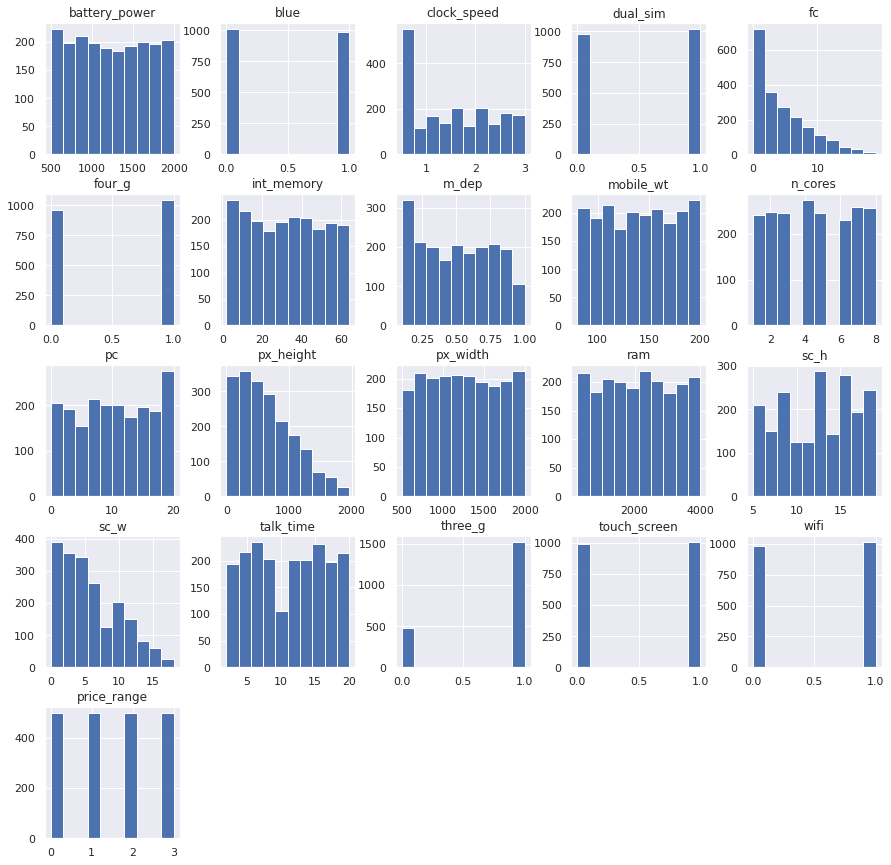

In [ ]:
df.hist(figsize=(15,15),bins=10)
plt.show()

Most importantly, price range is the label for this data set, and it is balanced. Most of the features are approximately uniformally distributed with little fluctuations in values. 

The features that showed a pronounced skewedness were:


*   Ram
*   fc
*  three_g
*  sc_w
*  px_height
* m_dp





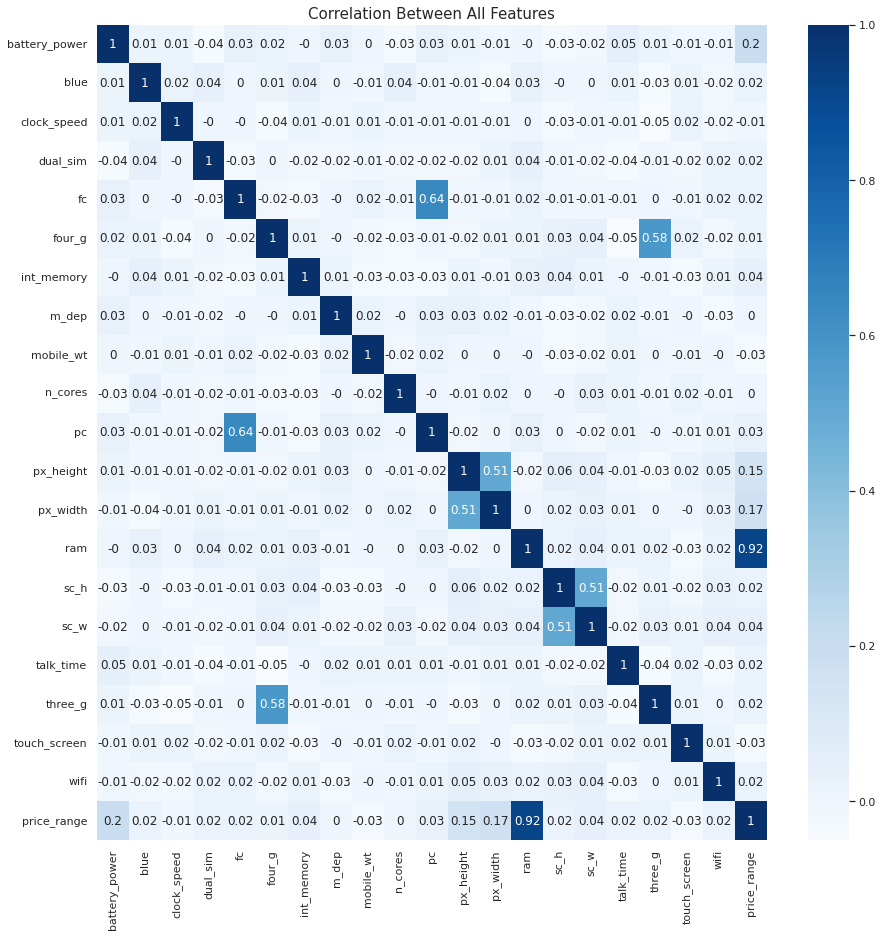

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(round(df.corr(),2), annot=True, cmap='Blues')
plt.title('Correlation Between All Features',fontsize=15)
plt.show()

In [ ]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Price range is higly correlated with ram feature and weakly correlated with battery_power ,px_width, and px_height with correlation coefficients of .92, .2, .17, .15 respectively.

four_g feature is intermediatelly correlated with three_g feature with correlation coefficient of .58.

sc_h and sc_w are intermediatelly correlated with each other with correlation coefficient of .51.

fc and pc are also intermediatelly correlated with each other with correlation coefficient of .64.

Otherwise, there is almost no correlation between the features with each other.

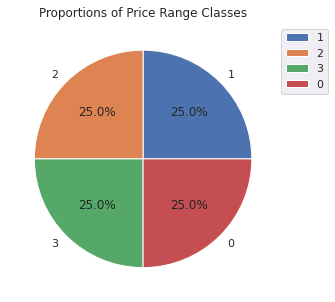

In [ ]:
df.price_range.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.title('Proportions of Price Range Classes')
plt.legend(bbox_to_anchor=(.2,0,1,1))
plt.ylabel('')
plt.show()

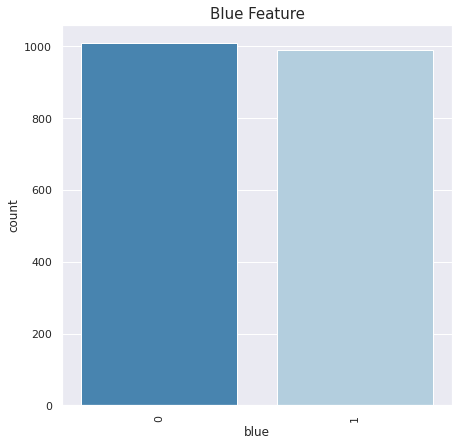

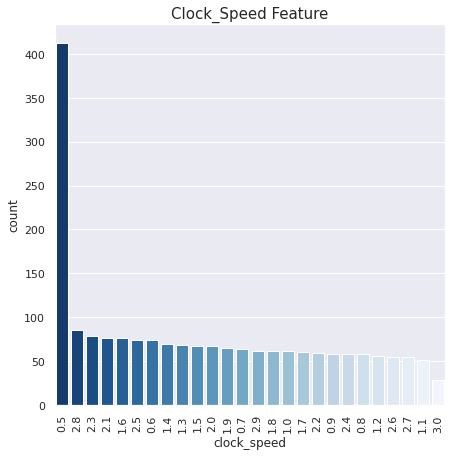

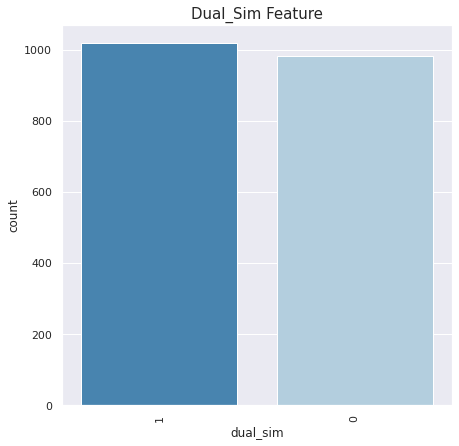

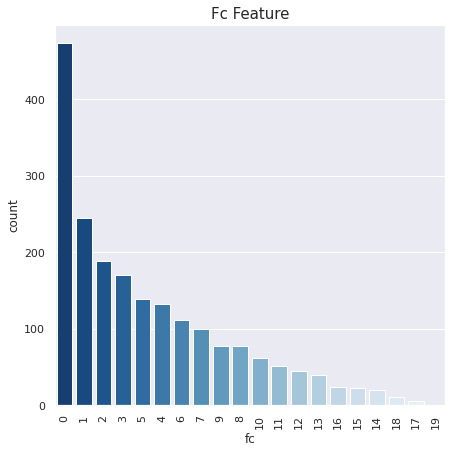

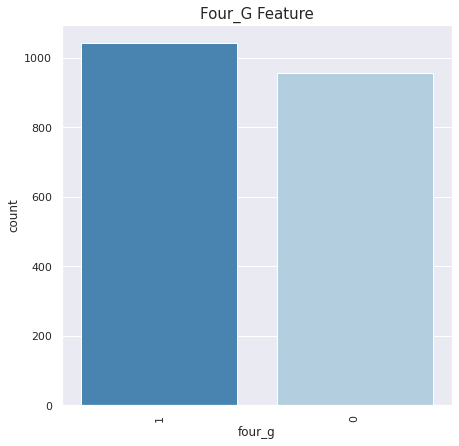

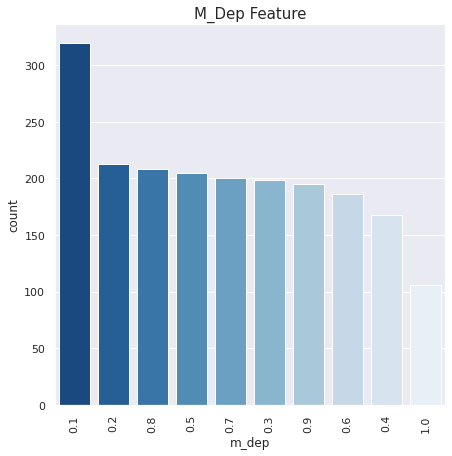

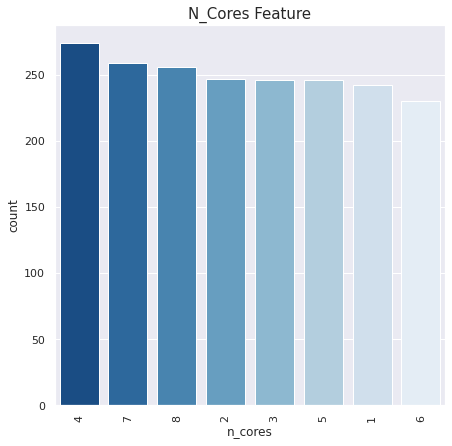

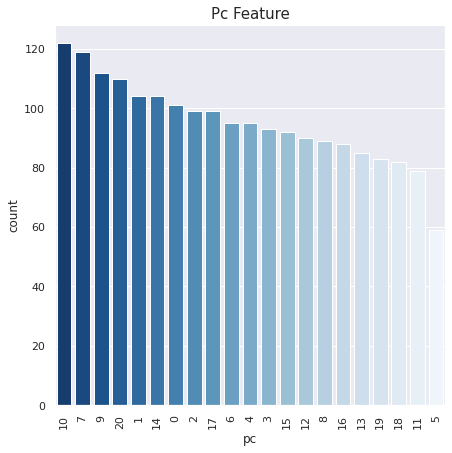

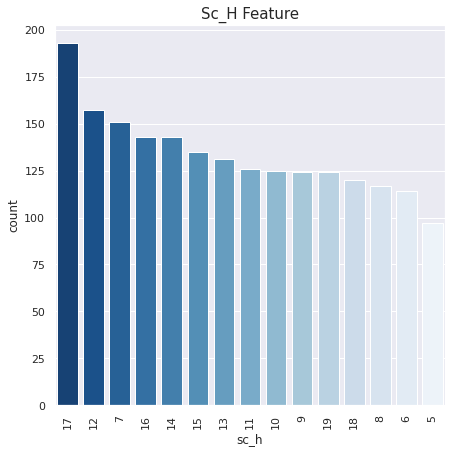

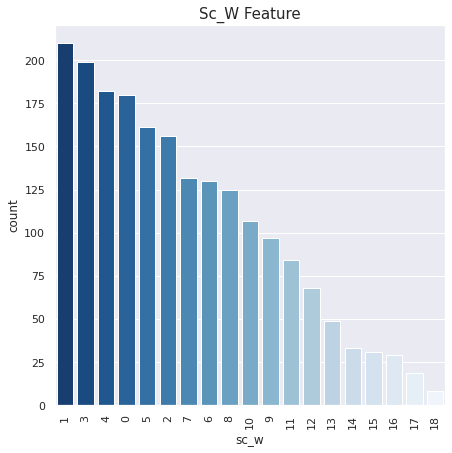

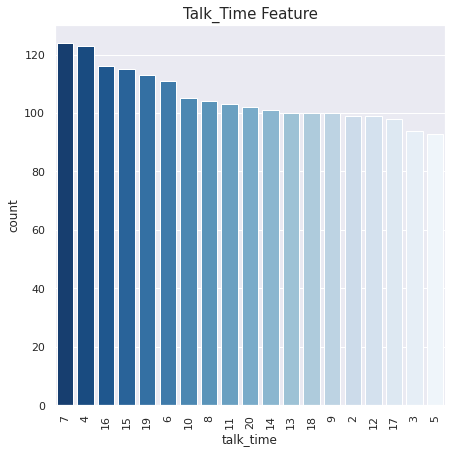

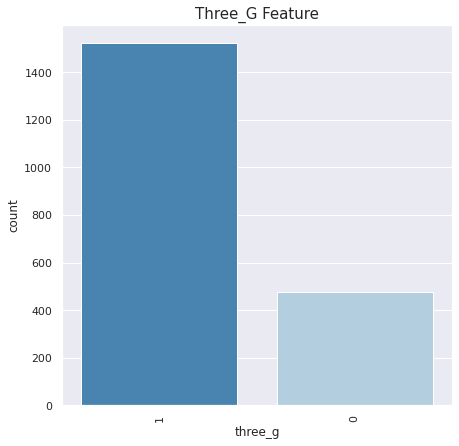

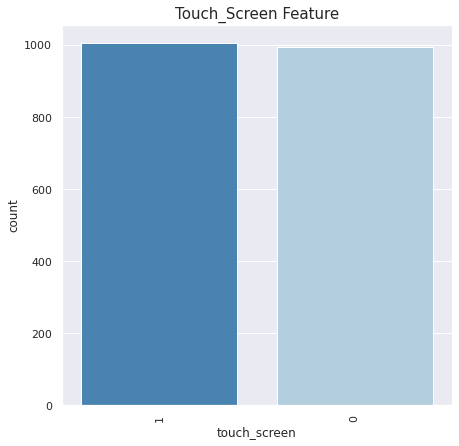

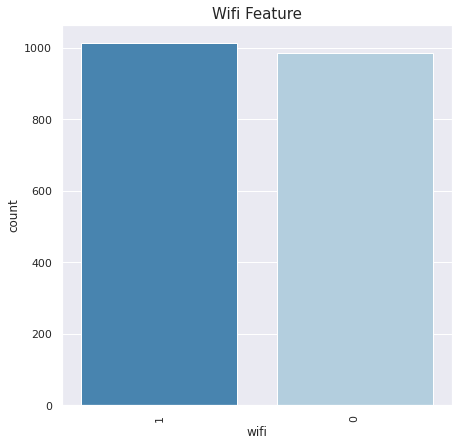

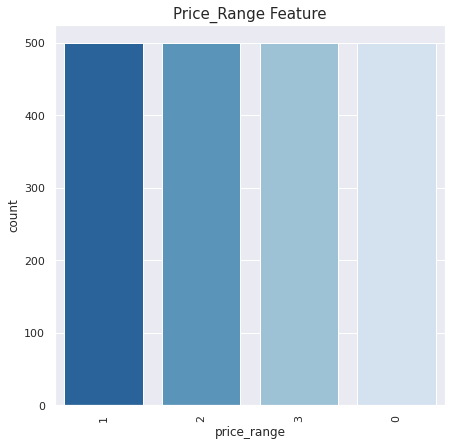

In [ ]:
for col in df.columns:
    if len(df[col].unique()) <30:
        plt.figure(figsize=(7,7))
        sns.countplot(data =df,x=col,order=df[col].value_counts().index, palette =sns.color_palette("Blues_r",len(df[col].unique()+5)))
#         df[col].value_counts().plot(kind='bar')
        plt.title(f'{col.title()} Feature',fontsize=15)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
# g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'black'}})
# plt.show()

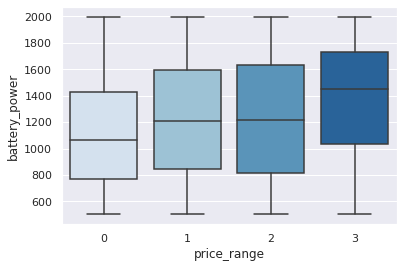

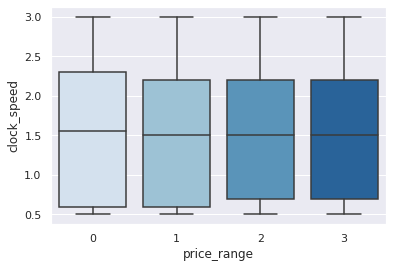

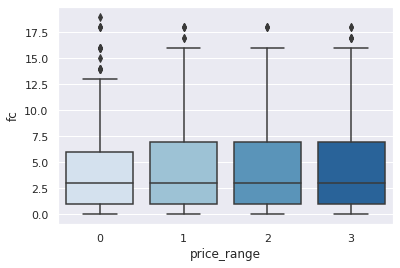

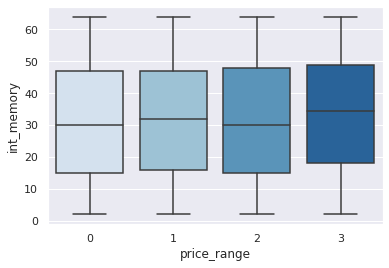

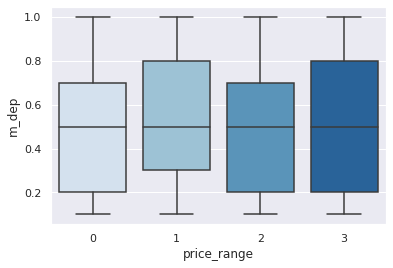

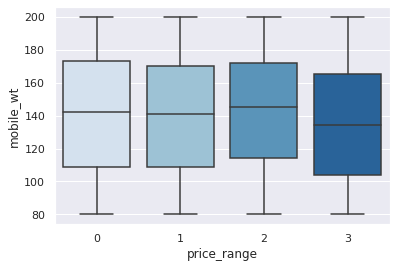

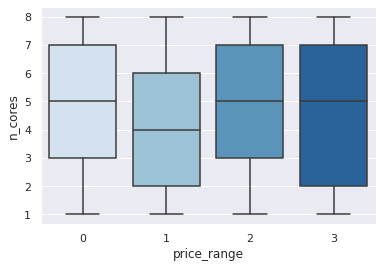

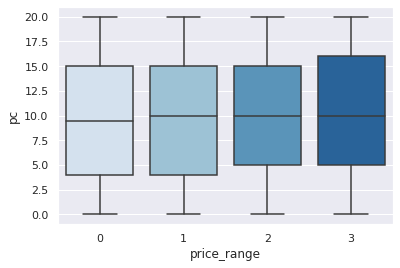

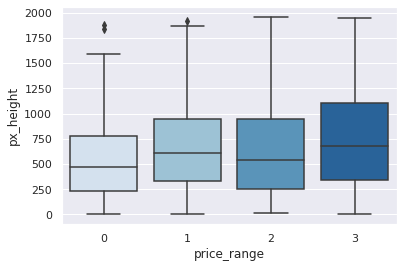

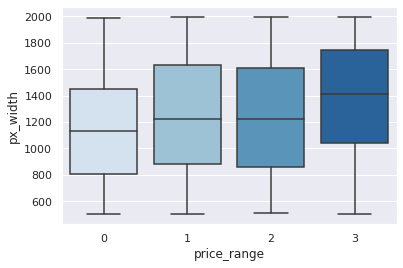

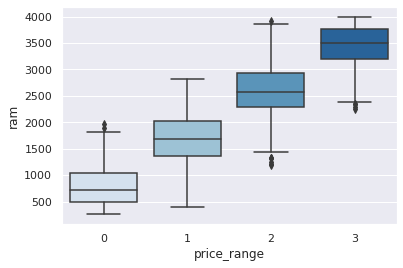

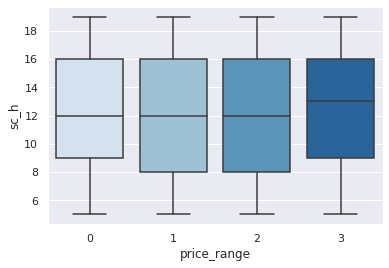

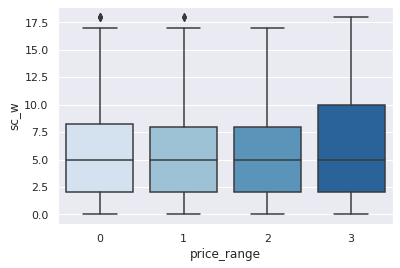

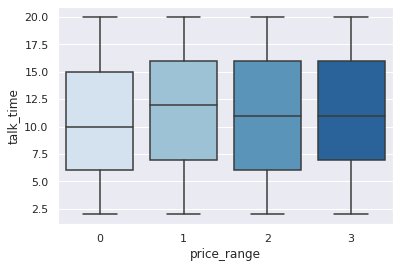

In [ ]:
for col in df.columns:
    if len(df[col].unique()) !=2 and col !='price_range':
        sns.boxplot(x="price_range", y=col,
                     palette=sns.color_palette('Blues',4),
                    data=df)
        plt.show()
        

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.groupby('price_range')['n_cores','px_height'].describe().T

price_range                0            1            2            3
n_cores   count   500.000000   500.000000   500.000000   500.000000
          mean      4.600000     4.298000     4.682000     4.502000
          std       2.268544     2.311684     2.262546     2.297074
          min       1.000000     1.000000     1.000000     1.000000
          25%       3.000000     2.000000     3.000000     2.000000
          50%       5.000000     4.000000     5.000000     5.000000
          75%       7.000000     6.000000     7.000000     7.000000
          max       8.000000     8.000000     8.000000     8.000000
px_height count   500.000000   500.000000   500.000000   500.000000
          mean    536.408000   666.892000   632.284000   744.848000
          std     372.824164   441.351209   445.789232   483.720179
          min       1.000000     0.000000    10.000000     0.000000
          25%     229.000000   327.250000   252.500000   341.750000
          50%     465.500000   606.000000   538.500000   674.000000
          75%     776.500000   944.250000   942.750000  1109.500000
          max    1878.000000  1914.000000  1960.000000  1949.000000

By inspecting the boxplots of each feature across each price range group we notice that there is not a huge gap between the 4 price range groups for most of the features. The feature that shows the largest variation across each group is the ram feature.As Ram increseases, mobile  price increaseas. For group 0 price range the ram is the lowest in terms of Q1 [488.75],Q3 [1037.00] and median [719.50]. Group 3 corresponding to the highest price range has the highest Q1 [3207.50],Q3 [3764.75] and median [3509.50]. and the values for Q1,Q3 and median is not overlapping for any of the groups.

The battery power feature also show a distinct behavior. Group 3 price range has the highest Q1 [1034.75], Q3 [1733.50], and median [1449.50] values. Group 0 price range has the lowest Q1 [770.50], Q3 [1431.25], and median [1066.00].

For the n cores feature, Q3 [7.00] and median [5.00] is the same for group 0, 2, and 3. Group 1 has the lowest Q3 [6.00] and meidan[4.00]. For Q1 group 1 and 3 are the lowest with equal values [2.00], while group 0 and 2 are the highest with equal values [3.00].

For the px_height group 3 price range has the highest Q1 [341.75], Q3 [1109.50], and median [674.00]. On the other hand group 0 has the lowest Q1 [229.00], Q3 [776.50] and median [465.50].

For the px_width the same behavior as px_height for the 4 groups of price range.

These box plots confirm the correlation results and the bar plots and histograms that show the almost unifrom distribution of most of the features.

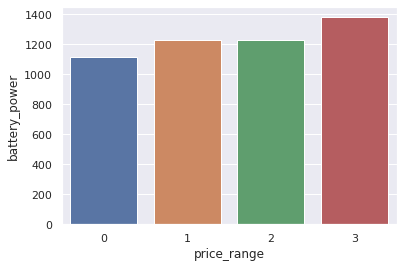

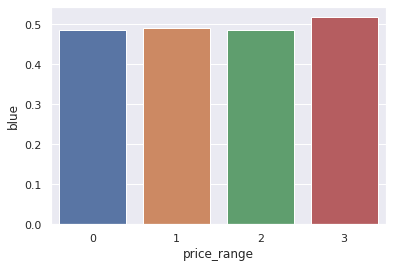

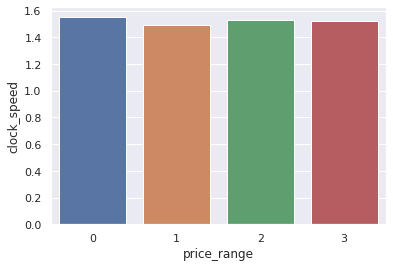

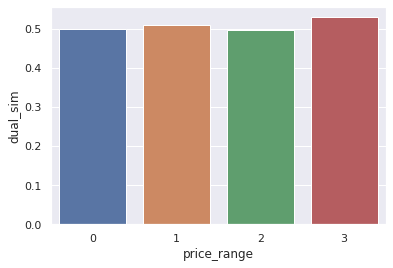

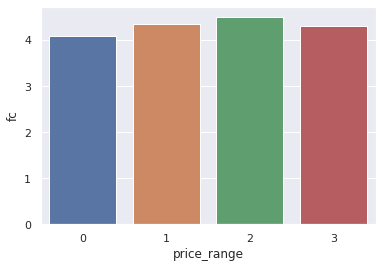

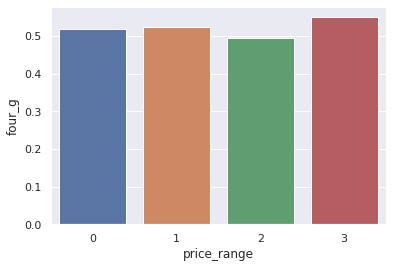

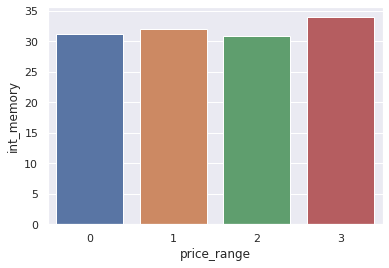

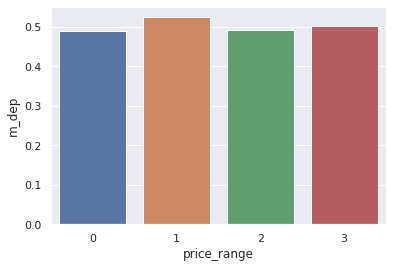

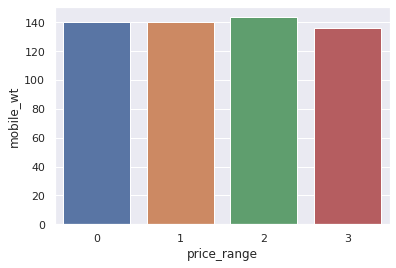

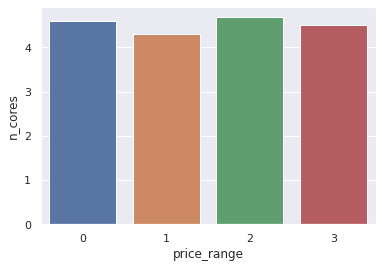

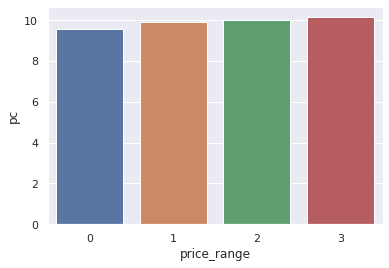

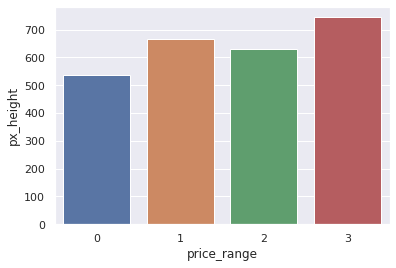

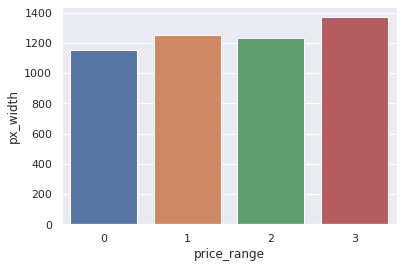

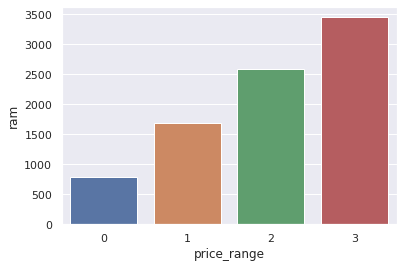

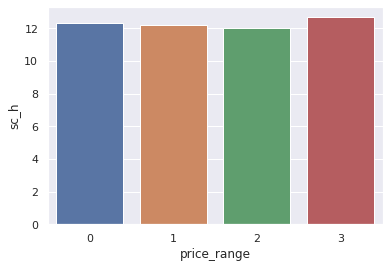

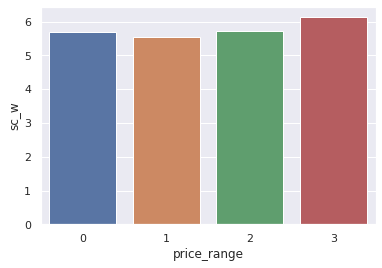

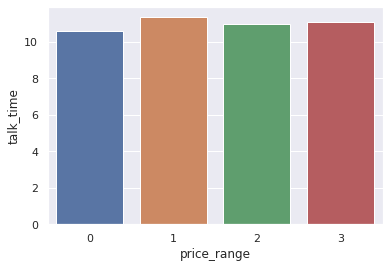

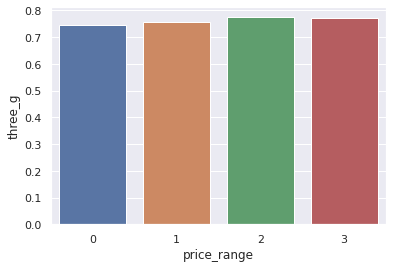

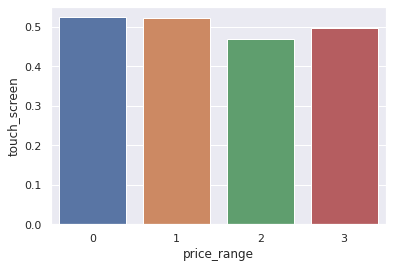

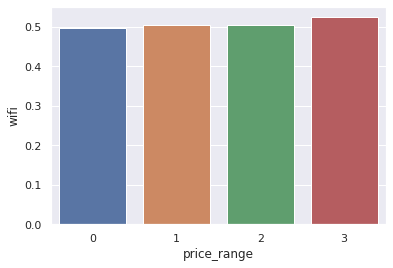

In [ ]:
for col in df.columns:
    if col !='price_range':
        x=df.groupby('price_range')[col].mean().to_frame().reset_index()

        sns.barplot(y=col,x='price_range',data = x)
        plt.show()
        

In [ ]:
for col in df.columns:
    if col !='price_range':
        print(df.groupby('price_range')[col].mean().to_frame())

             battery_power
price_range               
0                 1116.902
1                 1228.868
2                 1228.320
3                 1379.984
              blue
price_range       
0            0.486
1            0.490
2            0.486
3            0.518
             clock_speed
price_range             
0                 1.5502
1                 1.4886
2                 1.5298
3                 1.5204
             dual_sim
price_range          
0               0.500
1               0.510
2               0.498
3               0.530
                fc
price_range       
0            4.084
1            4.340
2            4.498
3            4.316
             four_g
price_range        
0             0.518
1             0.524
2             0.494
3             0.550
             int_memory
price_range            
0                31.174
1                32.116
2                30.920
3                33.976
              m_dep
price_range        
0            0.4902
1   

We next inspect the mean values of each feature across each price range group.

Once again, the distribution of the mean can be understood interms of the correlation coefficients. 

For the features that are correlated with the price range labels:

* ram feature: group 3 has the highest mean , then group 2, followed by group 1 and group 0 comes last with lowest mean 

* battery power: same trend as the ram but the variations is smaller. Group 3 has the highest mean [1379.98] , then group 2 [1228.32], followed by group 1 [1228.86] and group 0 [1116.90] comes last with lowest mean.

* px height: group 3 has the highest mean , then group 1, followed by group 2 and group 0 comes last with lowest mean 

* px width: same trend as the ram but the variations is smaller. group 3 has the highest mean , then group 1, followed by group 2 and group 0 comes last with lowest mean.


The rest of the features are shifting towards a uniform distribution with fluctuations between groups. the differences in the mean are small.

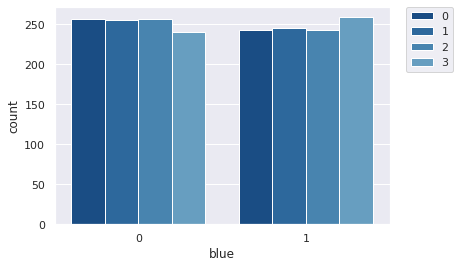

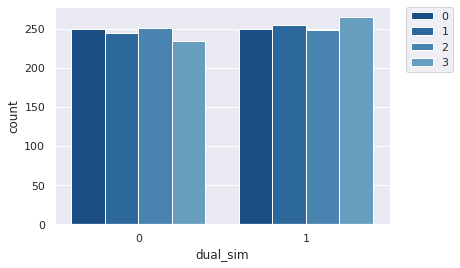

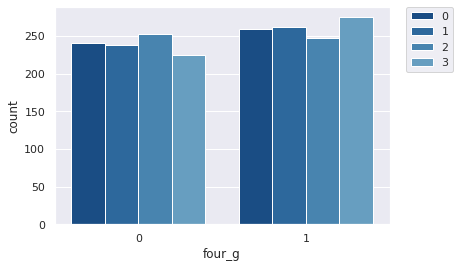

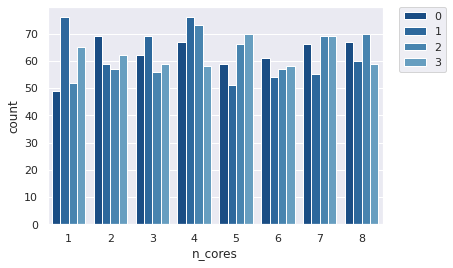

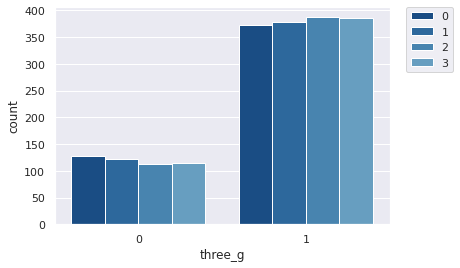

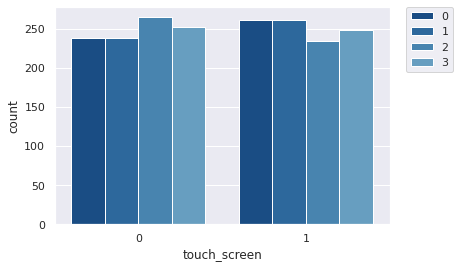

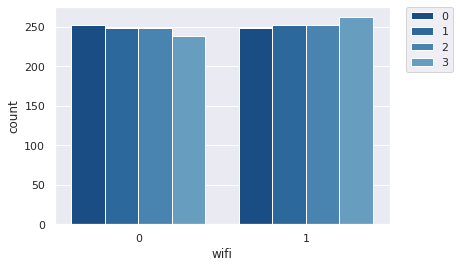

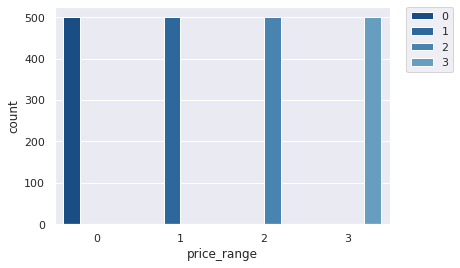

In [ ]:
for col in df.columns:
    if len(df[col].unique()) <10:
        ax = sns.countplot(x=col, hue='price_range',data=df,palette=sns.color_palette("Blues_r",8))
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.show()

Again ,this plot shows the almost uniform distribution of most of the features.

# ML

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score,RocCurveDisplay,auc,roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFpr,f_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import learning_curve

## Feature Selection

In [ ]:
X=df.drop('price_range', axis= 1)
y=df.price_range

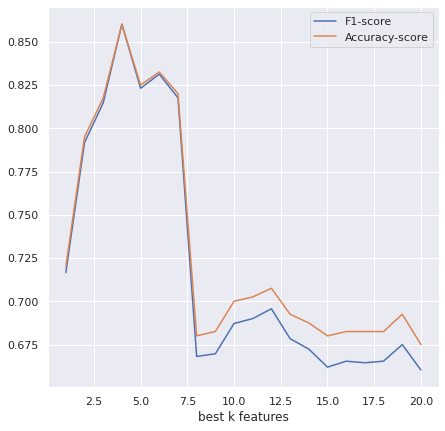

In [ ]:
f1_list=[]
acc_list=[]
feature_list=[]
for k in range(1,21):
    selector =SelectKBest(f_classif, k=k)
    selector.fit(X, y)
    X_trans = selector.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=13)
    feature_list.append(selector.get_feature_names_out(X.columns))
    lr = LogisticRegression(multi_class='ovr')
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = f1_score(test_y, y_pred, average='weighted')
    acc= accuracy_score(test_y, y_pred)
    f1_list.append(f1)
    acc_list.append(acc)
fig, axe = plt.subplots(figsize=(7,7))
axe.plot(range(1, 21,1), f1_list,label="F1-score")
axe.plot(range(1, 21,1), acc_list,label="Accuracy-score")

axe.set_xlabel("best k features")
# axe.set_ylabel("F1-score")
axe.legend()

From the graph above we find the when number of features is 4 we get the highest accuracy and f1-score. We find these 4 features to use in the training and testing phases.

In [ ]:
feature_list[3]

array(['battery_power', 'px_height', 'px_width', 'ram'], dtype=object)

The 4 features are 'battery_power', 'px_height', 'px_width', and 'ram'. This is consistent with the EDA since these are the most correlated features with the price range labels.

We extract the features to start choosing the best model.

In [ ]:
features = X[feature_list[3]]

## ML Model Selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=.2,random_state=13,stratify=y)

<Figure size 504x504 with 0 Axes>

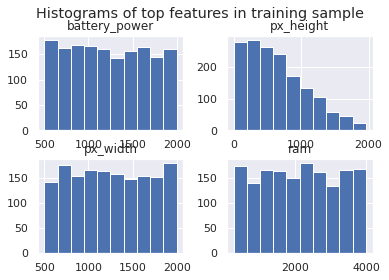

<Figure size 432x288 with 0 Axes>

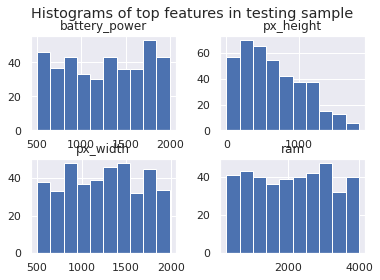

In [ ]:
plt.figure(figsize=(7,7))

X_train.hist()


plt.suptitle('Histograms of top features in training sample', )
plt.show()
plt.suptitle('')
X_test.hist()
plt.suptitle('Histograms of top features in testing sample', )
plt.show()

In [ ]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=10, 
                                 n_repeats=2, 
                                 random_state=42)


First, we are going to try the logistic regression model

### Logistic Regression

We set the multi_class into multinomial since our data has 4 different classes for the labels.

mean f1_macro 0.9577406009774266


Text(0.5, 1.0, 'F1_macro distribution of the training set for Logistic Regression model')

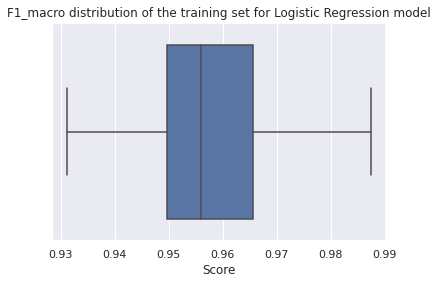

In [ ]:
lgr = LogisticRegression(multi_class='multinomial') #
lgr_pl = Pipeline([('scale', StandardScaler()),('logreg',lgr)])

scores = cross_val_score(lgr_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)
plt.xlabel('Score')
plt.title('F1_macro distribution of the training set for Logistic Regression model')

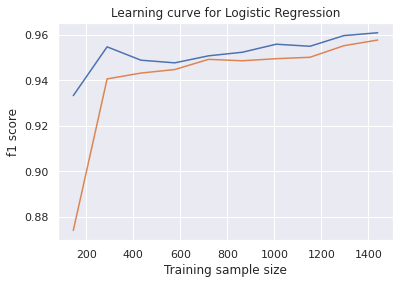

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lgr_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv, scoring='f1_macro')
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for Logistic Regression')
plt.show()

The mean f1 score is 0.96. The learning curve indicates that there is no overfitting. We shall perform grid search on this model and see the scores on the test data.

### KNN

We fit the training data using KNN model.

mean f1_macro 0.8988892290432278


Text(0.5, 1.0, 'F1_macro distribution of the training set for KNN model')

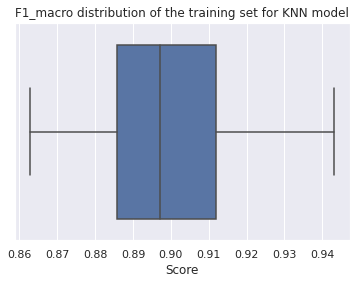

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20,n_jobs=-1)
knn_pl = Pipeline([('scale', StandardScaler()),('knn',knn)])
scores = cross_val_score(knn_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)
plt.xlabel('Score')
plt.title('F1_macro distribution of the training set for KNN model')

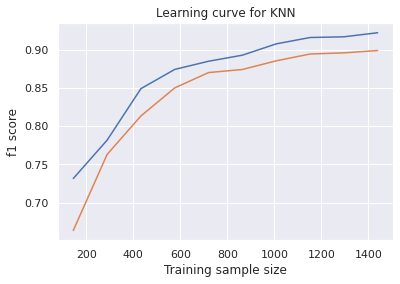

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv, scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for KNN')
plt.show()

The mean f1 score is 0.89.This model performs less than the logistic regression but the learning curve indicates that there is no overfitting.

### SVM

mean f1_macro 0.9410712469325695


<AxesSubplot:>

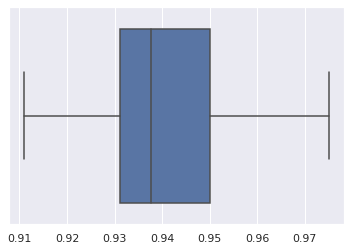

In [ ]:
from sklearn.svm import SVC
svmc=SVC(probability=True)
svm_pl = Pipeline([('scale', StandardScaler()),('svm',svmc)])
scores = cross_val_score(svm_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)

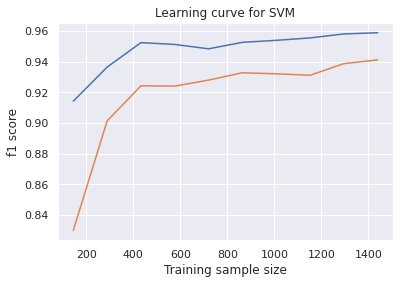

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv, scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for SVM')
plt.show()

The mean f1 score is 0.94.This model performs close to the logistic regression and the learning curve indicates that there is no overfitting.

### Decision Tree

We try to use Decision tree to model our training data.

In [ ]:
# cv = RepeatedStratifiedKFold(n_splits=20, 
#                                  n_repeats=20, 
#                                  random_state=42)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=13,stratify=y)

mean f1_macro 0.8608943125853938


<AxesSubplot:>

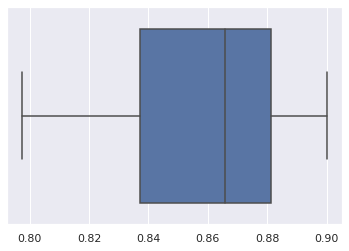

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_pl = Pipeline([('dtc',dtc)])
scores = cross_val_score(dtc_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)


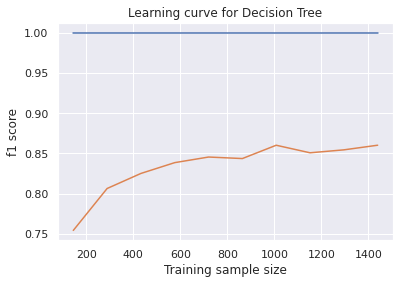

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dtc_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv,scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for Decision Tree')
plt.show()

The mean f1 score is 0.85.This model performs less than all previous models and the learning curve indicates that there is overfitting. We will perform grid search and find how well pruning the decision tree will regularize the overfitting.

### Random Forest

We moel our training data using Random Forest to try to fix the overfitting caused in the decision tree model.

mean f1_macro 0.914216937700864


<AxesSubplot:>

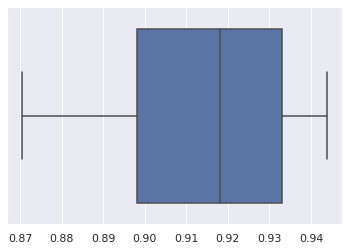

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc_pl = Pipeline([('scale', StandardScaler()),('rfc',rfc)])
scores = cross_val_score(rfc_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)

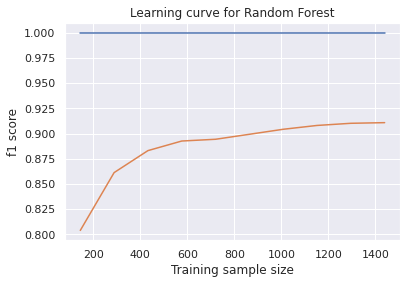

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rfc_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv,scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for Random Forest')
plt.show()

The mean f1 score is 0.91.This model performs comparebly well to the SVM and logistic regression for the traning data set. However,the learning curve still indicates that there is overfitting. We will perform grid search and find how well pruning the Random forest will regularize the overfitting.

### Naive Bayes

We apply Naive Nayes to the training data set.

mean f1_macro 0.8021560042433373


<AxesSubplot:>

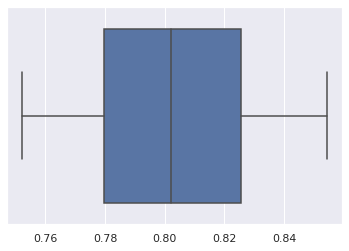

In [ ]:
from sklearn.naive_bayes import  GaussianNB
nbc = GaussianNB()
nbc_pl = Pipeline([('scale', StandardScaler()),('nbc',nbc)])
scores = cross_val_score(nbc_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)

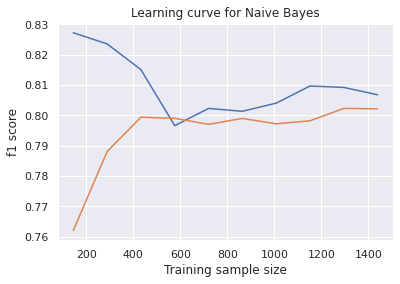

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(nbc_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv,scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for Naive Bayes')
plt.show()

Naive Bayes has the least f1 score so far 0.80. The learning curve is indicating that there is no overfitting for this model.

### XGBoost

Finally, we apply the XGBoost to the training data set.

mean f1_macro 0.9173801387580907


<AxesSubplot:>

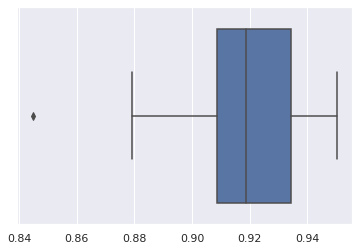

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc_pl = Pipeline([('scale', StandardScaler()),('xgbc',xgbc)])
scores = cross_val_score(xgbc_pl, X_train, y_train, 
                     scoring='f1_macro', 
                     cv=cv, n_jobs=-1)
print('mean f1_macro',np.mean(scores))
sns.boxplot(scores)

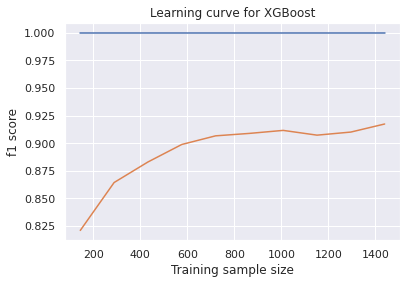

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(xgbc_pl,X_train, y_train, train_sizes=np.linspace(.1,1,10), cv=cv,scoring='f1_macro',n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.ylabel('f1 score')
plt.xlabel('Training sample size')
plt.title('Learning curve for XGBoost')
plt.show()

Similar to Random forest, the reported f1 score is 0.91. The learning curve indicates overfitting.

### Final Choice and Comparison

Based on the results and learning curves above we choose Logistic Regression and SVM to be our best candidate models to represent our data. We exclude Decision tree for it's overfitting and low f1 score. We exclude Naive Bayes due to it's lower f1 score. XGBoost and Random Forest need further expolration to try to regularize their overfitting and use their good f1 scores, if possible.

However, we shall perform search grid for all the models as exercise and to further analyze the situation.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4,random_state=None,stratify=y)

In [ ]:
# cv=KFold(n_splits=5,)#10
# cv2=StratifiedKFold(n_splits=5)
# selector = SelectFpr(f_classif, alpha=0.01)

# Hyperparameters Tuning

## Logistic Regression

We tune our first candidate model,logistic regression by applying gridsearch cross validation. First, we choose the multinomial value for the multiclass hyperparameter, this is due to the number of groups our labels have, which is 4. we apply the solver saga, and increase the max_iter to 1000 because sometimes it doesn't converge when using l1 and we want to keep it running.

We use pipelines to scale the data and then run the model ,we pass the pipeline to the gridsearchcv to perform the cross validation.



In [ ]:
lgr = LogisticRegression(multi_class='multinomial',solver='saga',max_iter=1000)
pl = Pipeline([('scale', StandardScaler()),('logreg',lgr)])


We tune the hyperparameters: 
* C from 0.1 to 10
* penalty l2, when using l1 and none, some errors in the run occur or it doesnot converge.

We use f1_macro as our scoring criteria since accuracy is not the best indicator of how the model performs and we need to understand the recall and precision of the model too.

In [ ]:
param_grid={'logreg__C':[0.1,0.2,0.4,0.5,1,2,4,5,6,7,8,9,10], 'logreg__penalty':['l2']}

rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv,scoring='f1_macro',n_jobs=-1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

y_pred=rand.predict(X_test)




Best Parameters are C=5 and l2 as penalty, it gives Mean cross-validated score of the best_estimator of 0.959

In [ ]:
rand.best_params_, rand.best_score_

({'logreg__C': 5, 'logreg__penalty': 'l2'}, 0.9590292501763893)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9625

To investigate overfitting, we get the score of both the train and test datasets. Since they are both comparable, we conclude that logistic regression model doesn't overfit our data. 

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.9619
Test set score: 0.9627


We get the values of recall,precision and f1_score and they all are 0.96. This indicates that the model performs well and generalizes well to the out of sample data.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9637042445482866, 0.9624999999999999, 0.962670266959134, None)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[97  3  0  0]
 [ 0 99  1  0]
 [ 0  5 94  1]
 [ 0  0  5 95]]


Classification report shows that the model predicts class 0 of price range the best followed by class 3 and 2 performs the least. From the confusion matrix we notice that class 2 has the largest number of mis-classified points and it mixes with both class 1 and 3 interms of recall and FN and TP values.


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.93      0.99      0.96       100
           2       0.94      0.94      0.94       100
           3       0.99      0.95      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# pip install scikit-plot

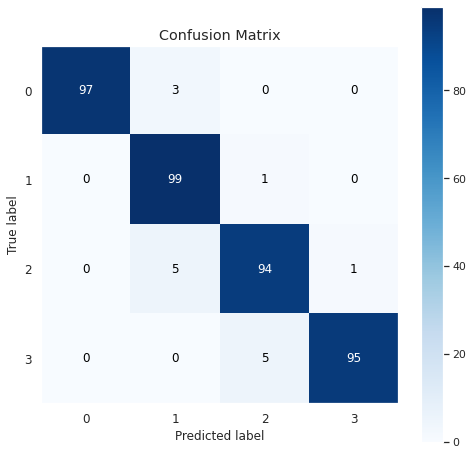

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

The AUC score is 0.9981 for the test dataset. This is a very good score. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 having the least AUC.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9981


(0.0, 1.05)

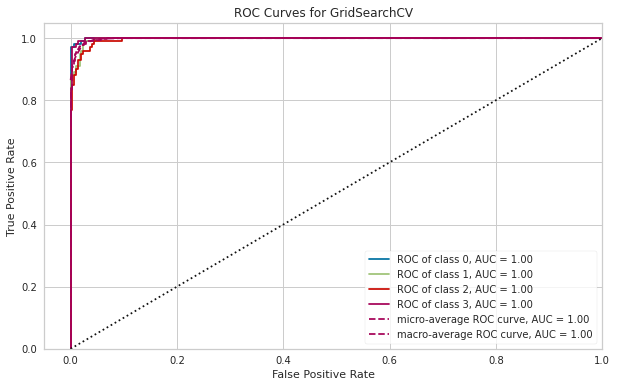

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure
                     # Finalize and render the figure

## SVM

We tune our second candidate model,SVM by applying gridsearch cross validation. First, we choose the SVC model.

We use pipelines to scale the data and then run the model ,we pass the pipeline to the gridsearchcv to perform the cross validation.

We tune the hyperparameters: 
* C from 0.1 to 10
* gamma, scale and auto.
* kernel: we try the linear, poly, rbf, and sigmoid kernels

We use f1_macro as our scoring criteria.

In [ ]:
from sklearn.svm import SVC
svmc=SVC(probability=True)

In [ ]:
pl = Pipeline([('scale', StandardScaler()),('svm',svmc)])
param_grid={'svm__kernel' : ['linear','poly', 'rbf', 'sigmoid'],
                'svm__C': [0.1,0.2,0.4,0.5,1,2,4,5,7,9,10],
                'svm__gamma': ['scale','auto']}

rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv, scoring='f1_macro',n_jobs=-1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)
rand.best_params_, rand.best_score_

({'svm__C': 9, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
 0.9602859521753727)

Best Parameters are C=9 and gamma as scale and kernel is linear, it gives Mean cross-validated score of the best_estimator of 0.96.

In [ ]:
rand.best_params_, rand.best_score_

({'svm__C': 9, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
 0.9602859521753727)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.965

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.9631
Test set score: 0.9652


To investigate overfitting, we get the score of both the train and test datasets. Since they are both comparable, we conclude that SVM model doesn't overfit our data.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[97  3  0  0]
 [ 0 99  1  0]
 [ 0  5 94  1]
 [ 0  0  4 96]]


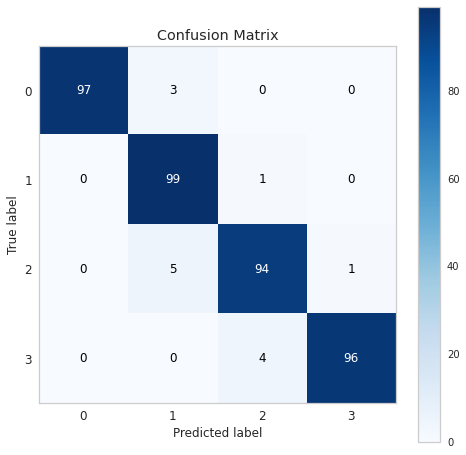

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 2 has the largest number of mis-classified points and it mixes with both class 1 and 3 interms of recall and FN and TP values. Class 0 has the best precision and f1 score, class 1 has best recall. Class 2 has the largest number of mis-classified points.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.9661048290010618, 0.965, 0.9651590550412623, None)

We get the values of recall,precision and f1_score and they all are 0.96. This indicates that the model performs well and generalizes well to the out of sample data.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9981


(0.0, 1.05)

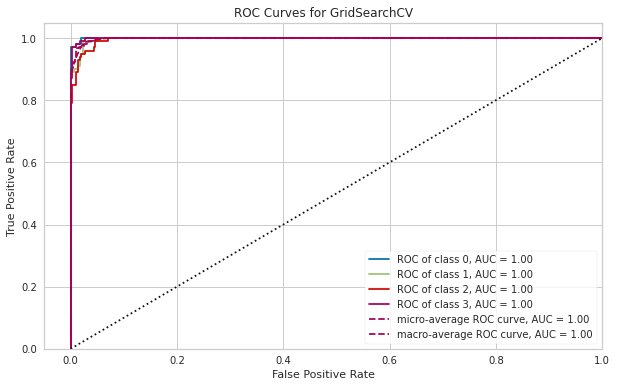

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure

The AUC score is 0.9981 for the test dataset. This is a very good score. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 having the least AUC.

## Random Forest

We tune Random Forest by applying gridsearch cross validation. We used the data without scaling or feature selection since these two properties are done inherently by the algorithm.

We apply the randomized gridsearch due to the computationally expensive nature of random forest.

We tune the hyperparameters:

min_samples_split from 7 to 1

min_samples_leaf from 7 to 1


We use f1_macro as our scoring criteria since accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

In [ ]:
pl = Pipeline([('rfc',rfc)])
param_grid={'rfc__min_samples_split':np.arange(7,0,-1),'rfc__min_samples_leaf':np.arange(7,0,-1),
                }
rand =  RandomizedSearchCV(pl, param_distributions=param_grid, n_iter=20, scoring='f1_macro', n_jobs=-1, cv=cv, verbose=False, random_state=1001 );
# rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv, scoring='f1_macro',n_jobs=-1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)

In [ ]:
rand.best_params_, rand.best_score_,

({'rfc__min_samples_split': 3, 'rfc__min_samples_leaf': 1}, 0.915625)

Best Parameters are min_samples_split = 3 and min_samples_leaf =1. It gives Mean cross-validated score of the best_estimator of 0.915.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.92

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9200


To investigate overfitting, we get the score of both the train and test datasets. Since they are both NOT comparable, we conclude that Random Forest model overfits our data.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[97  3  0  0]
 [ 7 90  3  0]
 [ 0  8 89  3]
 [ 0  0  8 92]]


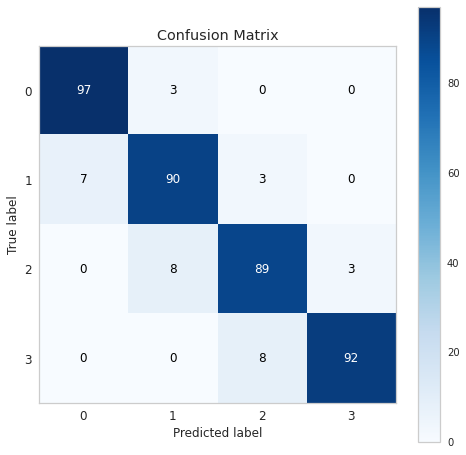

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 2 has the largest number of mis-classified points and it mixes with both class 1 and 3 interms of recall and FN and TP values. Class 0 has the highest recall. The prediction behavior of the matrix is similar to that of Logistic regression and SVM. 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.9205506173086945, 0.92, 0.9200231309515771, None)

We get the values of recall,precision and f1_score and they all are 0.92. But with the overfitting, we still exclude this model.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9912


(0.0, 1.05)

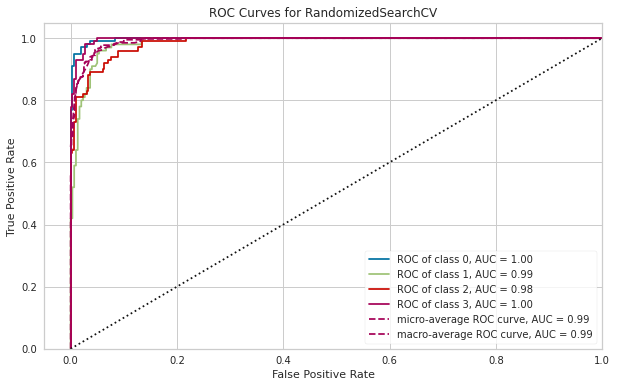

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure

The AUC score is 0.9912 for the test dataset. This is a very good score. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 having the least AUC. But it's not addressing the overfitting issue.

## XGBoost

We tune XGBoost by applying gridsearch cross validation.

We apply the randomized gridsearch due to the computationally expensive nature of XGBoost.

We tune the hyperparameters indicated by the param_grid dictionary.

We use f1_macro as our scoring criteria since accuracy.

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [ ]:
pl = Pipeline([('scale', StandardScaler()),('xgbc',xgbc)])
param_grid = {
        'xgbc__min_child_weight': [1, 5, 10],
        'xgbc__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbc__subsample': [0.6, 0.8, 1.0],
        'xgbc__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbc__max_depth': [3, 4, 5]
        }

rand =  RandomizedSearchCV(pl, param_distributions=param_grid, n_iter=5, scoring='f1_macro', cv=cv, verbose=False, random_state=1001,n_jobs=-1 )

rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)

In [ ]:
rand.best_params_, rand.best_score_

({'xgbc__subsample': 0.8,
  'xgbc__min_child_weight': 1,
  'xgbc__max_depth': 4,
  'xgbc__gamma': 1,
  'xgbc__colsample_bytree': 1.0},
 0.9148017265287782)

Best Parameters are subsample = 0.8 min child weight = 1, max depth = 4, gamma =1, and colsample bytree = 1.0, it gives Mean cross-validated score of the best_estimator of 0.91

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9175

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.9919
Test set score: 0.9174


To investigate overfitting, we get the score of both the train and test datasets. Since they are both NOT comparable, we conclude that XGBOOST model overfits our data and we exclude it.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[97  3  0  0]
 [ 6 90  4  0]
 [ 0  9 87  4]
 [ 0  0  7 93]]


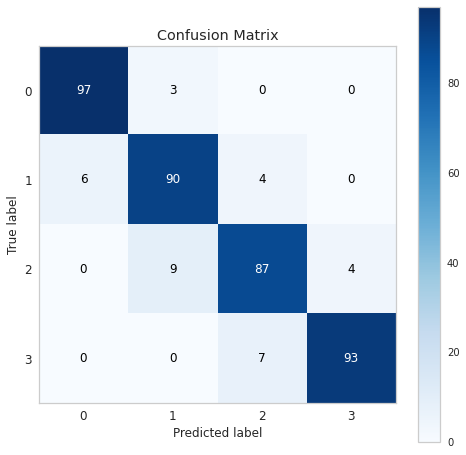

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 2 has the largest number of mis-classified points followed by class 1. Class 0 has the least mis-classified number of points.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.9176546256576898, 0.9175000000000001, 0.9174261122193837, None)

We get the values of recall,precision and f1_score and they all are 0.91. But with the overfitting we exclude the model

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9911


(0.0, 1.05)

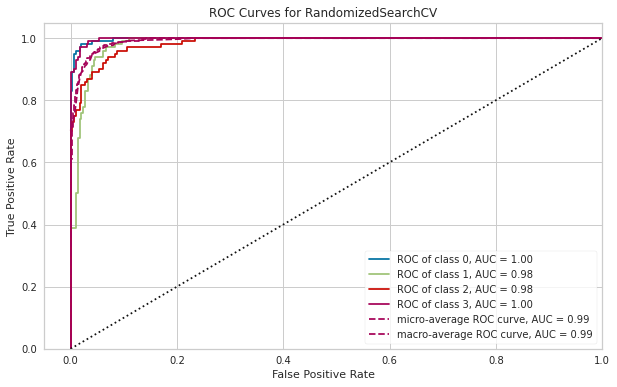

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     

The AUC score is 0.9911 for the test dataset. This is a very good score. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 and 1 having the least AUC. The overfitting issue is not shown by the ROC curves

## Decision Tree

We tune Decision Tree by applying gridsearch cross validation. We used the data without scaling or feature selection since these two properties are done inherently by the algorithm.

We tune the hyperparameters indicated by the param_grid dictionary.

We use f1_macro as our scoring criteria since accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
pl = Pipeline([('dtc',dtc)])
param_grid={'dtc__criterion':['gini' ,'entropy'],'dtc__max_depth':[5,4,3,2,1],'dtc__splitter':['best', 'random'],'dtc__min_samples_split':np.arange(40,0,-1),'dtc__min_samples_leaf':np.arange(40,0,-1)}

rand =  RandomizedSearchCV(pl, param_distributions=param_grid, n_iter=5, scoring='f1_micro', cv=cv, verbose=False, random_state=1001,n_jobs=-1 );
# rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv, scoring='f1_macro') 
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)

In [ ]:
rand.best_params_, rand.best_score_

({'dtc__splitter': 'best',
  'dtc__min_samples_split': 25,
  'dtc__min_samples_leaf': 32,
  'dtc__max_depth': 5,
  'dtc__criterion': 'entropy'},
 0.8193750000000002)

Best parameters are 'dtc__splitter' = 'best',
  'dtc__min_samples_split' = 25,
  'dtc__min_samples_leaf' = 32,
  'dtc__max_depth'=  5, and
  'dtc__criterion'= 'entropy'. It gives Mean cross-validated score of the best_estimator of 0.819, this score is low comppared to the SVM and logistic regression leading to the confirmation of its exclusion

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.82

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.8662
Test set score: 0.8200


To investigate overfitting, we get the score of both the train and test datasets. Since they are both NOT comparable, we conclude that Decision Tree model overfits our data.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[92  8  0  0]
 [19 65 16  0]
 [ 0  6 82 12]
 [ 0  0 11 89]]


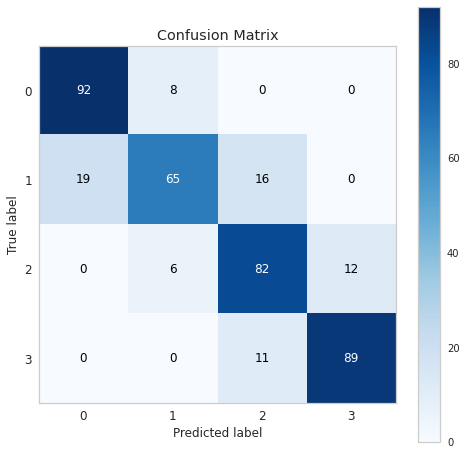

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 1 has the largest number of mis-classified points and it mixes with both class 1 and 3 interms of recall and FN and TP values.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='micro')


(0.82, 0.82, 0.82, None)

We get the values of recall,precision and f1_score and they all are 0.82. This indicates that the model does not perform as good as SVM and Logistic Regression in terms of f1 scores too. This re-confirms the exclusion decision.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9514


(0.0, 1.05)

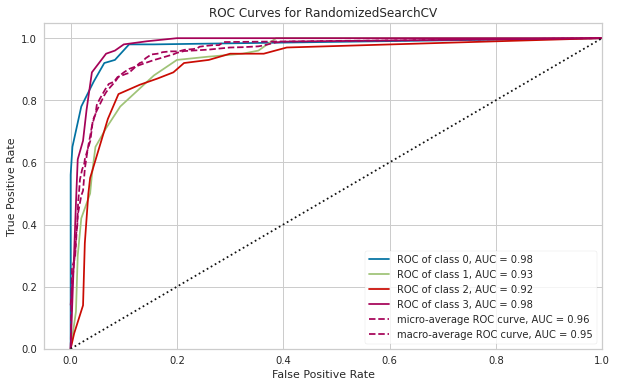

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure

## Naive Bayes

We tune Decision Tree by applying gridsearch cross validation. We use Gaussian Naive Bayes dut to scaling data, which introduces negative values of z-score. This created errors for the Multinomial Naive Bayes.

We tune the hyperparameters indicated by the param_grid dictionary.

We use f1_macro as our scoring criteria since accuracy.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB


nbc = GaussianNB()


In [ ]:
nbc.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [ ]:
pl = Pipeline([('scale', StandardScaler()),('nbc',nbc)])
param_grid={'nbc__priors':[None,[.25,.25,.25,.25], [.125,.375,.25,.25]],'nbc__var_smoothing': np.logspace(0,-9, num=100)}

rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv, scoring='f1_macro',n_jobs=-1) # scoring?? how to finalize scoring and how to get confusion matrix and roc and auc 
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)

In [ ]:
rand.best_params_, rand.best_score_

({'nbc__priors': None, 'nbc__var_smoothing': 0.657933224657568},
 0.8474236268849633)

Best parameters are nbc__priors'= None, 'nbc__var_smoothing'= 0.657933224657568. It gives Mean cross-validated score of the best_estimator of 0.847, this score is low comppared to the SVM and logistic regression leading to the confirmation of its exclusion

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.845

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 0.8574
Test set score: 0.8449


To investigate overfitting, we get the score of both the train and test datasets. Since they are both comparable, we conclude that Naive Bayes model doesn't overfit our data.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[97  3  0  0]
 [10 74 16  0]
 [ 0 23 75  2]
 [ 0  0  8 92]]


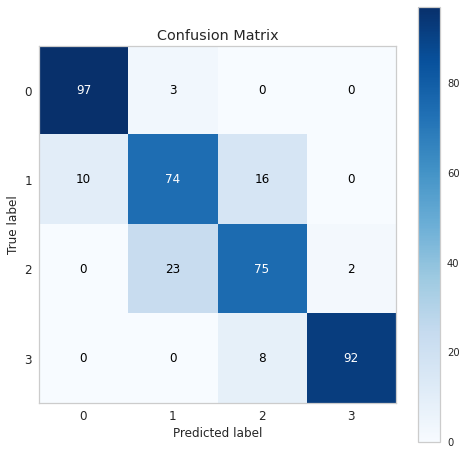

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 1 has the largest number of mis-classified points followed by group 2. It seems that there is some large mis-classification between 1 and 2.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.8457103044764608, 0.845, 0.8448551300253446, None)

We get the values of recall,precision and f1_score and they all are 0.84. This indicates that the model does not perform well as f1 scores are also lower than those for SVM and Logistic Regression. Reconfirming our exclusion decision.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9474


(0.0, 1.05)

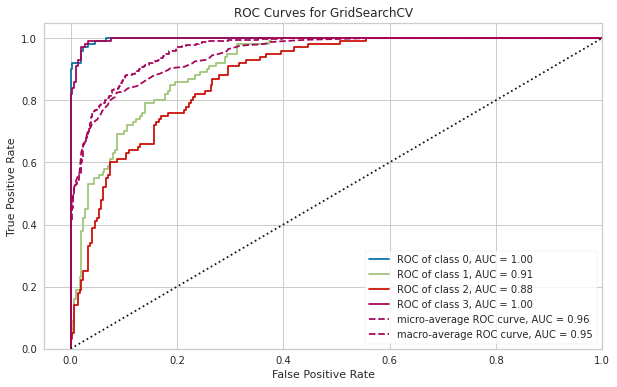

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure

The AUC score is 0.94 for the test dataset. This is a low score compared with all previous models. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 having the least AUC followed by class 1.

## KNN

We tune KNN by applying gridsearch cross validation. 

We tune the hyperparameters indicated by the param_grid dictionary.

We use f1_macro as our scoring criteria since accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
pl = Pipeline([('scale', StandardScaler()),('knn',knn)])
param_grid={'knn__n_neighbors':[2,3,4,5,6,7,8,9,10,15,20,40], 'knn__weights':['uniform', 'distance'],'knn__metric':['euclidean', 'manhattan', 'minkowski']}

rand = GridSearchCV(estimator=pl, param_grid= param_grid, cv=cv, scoring='f1_macro',n_jobs=-1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
y_pred=rand.predict(X_test)


In [ ]:
rand.best_params_, rand.best_score_

({'knn__metric': 'manhattan',
  'knn__n_neighbors': 40,
  'knn__weights': 'distance'},
 0.9215517324668105)

Best Parameters are knn__metric' = 'manhattan',
  'knn__n_neighbors'= 40,
  'knn__weights'= 'distance', it gives Mean cross-validated score of the best_estimator of 0.922.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [ ]:
print('Training set score: {:.4f}'.format(rand.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rand.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9132


To investigate overfitting, we get the score of both the train and test datasets. Since they are both NOT comparable, we conclude that KNN model overfits our data and exclude it.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[94  6  0  0]
 [ 4 90  6  0]
 [ 0  7 91  2]
 [ 0  0 10 90]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.90      0.89       100
           2       0.85      0.91      0.88       100
           3       0.98      0.90      0.94       100

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



Classification report shows that the model predicts class 0 of price range the best followed by class 3 and 2 performs the least, as with most of the previous models. From the confusion matrix we notice that class 1 and 3 has the largest number of mis-classified points. The missclassified points for the 4 ranges is of low variance.

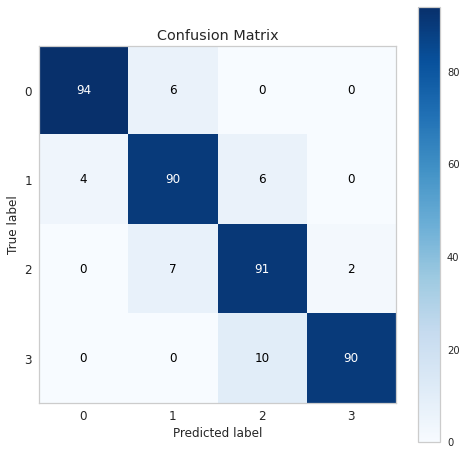

In [ ]:
import scikitplot as skplt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="Blues" , #Purpules
                                    ax=ax
                                    );

From the confusion matrix we notice that class 2 has the largest number of mis-classified points followed by class 1. It seems that there is some large mis-classification between 1 and 2, class 3 also mis-classifies as 2.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')


(0.9154245601303055, 0.9125, 0.9132303775060521, None)

We get the values of recall,precision and f1_score and they all are 0.91. However, due to overfitting we exclude it.

In [ ]:
from sklearn.metrics import roc_auc_score
pred_prob = rand.predict_proba(X_test)
ROC_AUC = roc_auc_score(y_test, pred_prob,multi_class="ovo")

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9898


(0.0, 1.05)

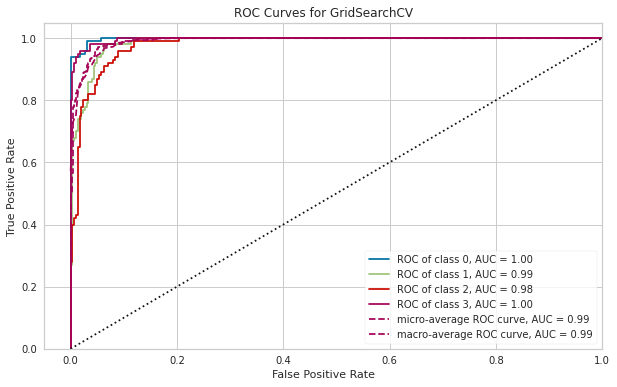

In [ ]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize = (10,6))
visualizer = ROCAUC(rand, classes=[0,1,2,3], ax=ax)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.finalize()   
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])                     # Finalize and render the figure

The AUC score is 0.9898 for the test dataset. This is a very good score. And the ROC-AUC curve shows similar results to those we got from the confusion matrix in terms of how each group performs with class 2 and 1 having the least AUC. The overfitting issue is not shown by the ROC curves

# Applying Best Models to External Dataset (Test file)

The test dataset provided by kaggle has no way of confirming labels predicted. We will use kmeans to fit the data and predict the testset labels.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_scores=[]
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(X) 
    kmeans_scores.append(kmeans.inertia_)

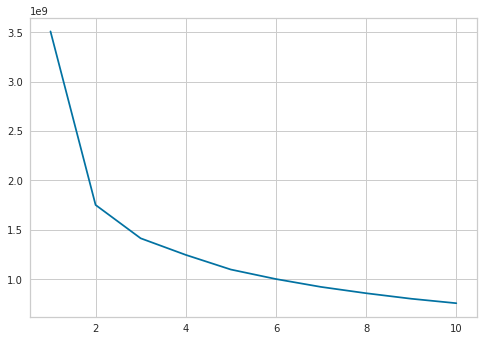

In [ ]:
plt.plot(np.arange(1,11),kmeans_scores)

From the distribution of the inertia scores vs. the number or clusters predicted we find that k=5 gives the best performance. This is contradicting to the 4 class labels given.

We apply the kmeans to the test dataset and k = 5 is a third elbow to the inertia scores.

In [ ]:
df_test=pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')



In [ ]:
kmeans_scores=[]
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42,)
    kmeans.fit(df_test) 
    kmeans_scores.append(kmeans.inertia_)

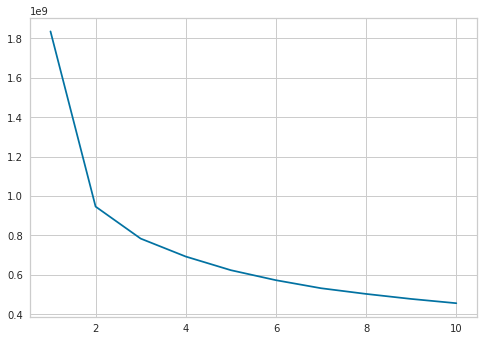

In [ ]:
plt.plot(np.arange(1,11),kmeans_scores)

In [ ]:
features.columns

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

However we apply clusters = 4 to match the labels of the given traning set.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42,max_iter=500)
kmeans.fit(df_test[['battery_power', 'px_height', 'px_width', 'ram']])


KMeans(max_iter=500, n_clusters=4, random_state=42)

In [ ]:
test = df_test
test['price_range']=kmeans.labels_.tolist()
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
print('kmeans',test.groupby('price_range')['ram'].mean())
print('train',df.groupby('price_range')['ram'].mean())

kmeans price_range
0     748.950943
1    2559.893939
2    3395.054983
3    1811.813008
Name: ram, dtype: float64
train price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64


comparing the ram feature mean to assign the correct labels to each cluster and it's corresponding train labels we note that kmeans groups 0 is correctly labeled. 1, 2 and 3 are mislabeled, so we will re assign them

In [ ]:
test['price_range'].replace(1,-1, inplace=True)
test['price_range'].replace(3,-2, inplace=True)
test['price_range'].replace(2,3, inplace=True)
test['price_range'].replace(-2,1, inplace=True)
test['price_range'].replace(-1,2, inplace=True)

In [ ]:
print('kmeans',test.groupby('price_range')['ram'].mean())
print('train',df.groupby('price_range')['ram'].mean())

kmeans price_range
0     748.950943
1    1811.813008
2    2559.893939
3    3395.054983
Name: ram, dtype: float64
train price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64


Now, we test our logistic regression model, using the best parameters done above, assuming that k-means is the absolute correct model. We then compare the results of the labels from the logistic regression to those we get from k-means.

In [ ]:
lgr_test = LogisticRegression(multi_class='multinomial',solver='saga',penalty='l2',C=5)
pl_test = Pipeline([('scale', StandardScaler()),('logreg',lgr_test)])
pl_test.fit(X_train,y_train)
y_pred_final = pl_test.predict(df_test[['battery_power', 'px_height', 'px_width', 'ram']])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['price_range'], y_pred_final)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[197  66   2   0]
 [ 58 144  44   0]
 [  0  15 113  70]
 [  0   5  94 192]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test['price_range'], y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       265
           1       0.63      0.59      0.61       246
           2       0.45      0.57      0.50       198
           3       0.73      0.66      0.69       291

    accuracy                           0.65      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.66      0.65      0.65      1000



From classification report and confusion matrix, we see that the mis-classification is maximum for group 2 with the lowest f1 score, followed by class 1.

We also try calculating the performance of the SVM model

In [ ]:
from sklearn.svm import SVC
svm_test=SVC(probability=True,kernel='linear',C=9,gamma='scale')

pl_test = Pipeline([('scale', StandardScaler()),('svm',svm_test)])
pl_test.fit(X[['battery_power', 'px_height', 'px_width', 'ram']],y)
y_pred_final = pl_test.predict(df_test[['battery_power', 'px_height', 'px_width', 'ram']])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['price_range'], y_pred_final)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[198  64   3   0]
 [ 57 147  42   0]
 [  0  15 113  70]
 [  0   5  93 193]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test['price_range'], y_pred_final))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       265
           1       0.64      0.60      0.62       246
           2       0.45      0.57      0.50       198
           3       0.73      0.66      0.70       291

    accuracy                           0.65      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.66      0.65      0.66      1000



From classification report and confusion matrix, we see that the mis-classification is maximum for group 2 with the lowest f1 score, followed by class 1.

# Summary

Both logistic regression and SVM have the best performance for our dataset. 

Class 2 and class 1 have the worst f1 score and the largest numbers of mis-classified points.

XGBoost and Random Forest and KNN have good score for the test data but they overfit the training data causing the exclusion of their use.

Naive Bayes has low performance - 0.84 f1 score and accuracy. Causing its exclusion.

Not only does Decision Tree overfits, but it has the lowest performance in terms of f1 score and accuracy compared to all the other models.

# Recommendations and Future Work

* We would like to try the ensamble of both SVM and logistic regression since they both have very close performances.

* We would like to try different classification groups due to the obvious inttersection between groups 1,2, and 3. 

* We would like to try all the classification algorithms on that new classification and test the performance.